In [14]:
import matplotlib.pyplot as plt
import pandas as pd

In [15]:
data_df = pd.read_csv('AlgeriaExport.txt', header=None)
data = data_df.iloc[:, 0]

In [16]:
print(data)
print(len(data))

0     39.043173
1     46.244557
2     19.793873
3     24.684682
4     25.084059
5     22.603944
6     25.986198
7     23.434417
8     23.135635
9     23.788777
10    22.072733
11    18.442519
12    20.449562
13    25.503663
14    38.749044
15    33.688936
16    33.054584
17    30.586567
18    25.535837
19    31.148300
20    34.338461
21    34.587251
22    30.924856
23    27.941806
24    25.710016
25    23.583933
26    12.854757
27    14.272475
28    15.507868
29    18.639263
30    23.443685
31    29.117822
32    25.319594
33    21.783877
34    22.530725
35    26.194776
36    29.760448
37    30.906311
38    22.578354
39    28.150116
40    42.069718
41    36.689305
42    35.504533
43    38.248829
44    40.053226
45    47.205193
46    48.810688
47    47.068164
48    47.973345
49    35.371651
50    38.444548
51    38.786954
52    36.890548
53    33.209898
54    30.219117
55    23.171778
56    20.860011
57    22.638887
Name: 0, dtype: float64
58


In [17]:
train_data = data[:40]
test_data = data[40:]

In [18]:
def simple_exponential_smoothing(data, alpha, n_future):
    forecast = pd.Series(dtype=float)
    forecast[0] = data[0]

    for i in range(1, len(data)):
        forecast[i] = alpha * data[i-1] + (1 - alpha) * forecast[i-1]

    for j in range(n_future):
        forecast[len(data) + j] = alpha * forecast[len(data) + j - 1] + (1 - alpha) * forecast[len(data) + j - 2]

    fitted_values = forecast[:len(data)]
    predicted_values = forecast[len(data):]

    return fitted_values, predicted_values

In [19]:
def sse(forecast, actual):
    return sum([(actual[i] - forecast[i])**2 for i in range(len(actual))])

In [20]:
def grid_search(data, alpha_decrement):
    alpha = 1
    best_alpha = None
    best_sse = float('inf')
    while alpha >= 0:
        fitted, _ = simple_exponential_smoothing(train_data, alpha, 0)
        current_sse = sse(fitted, train_data)
        if current_sse < best_sse:
            best_sse = current_sse
            best_alpha = alpha
            
        alpha -= alpha_decrement

    return best_alpha

In [25]:
best_alpha = grid_search(train_data, 0.01)
print(best_alpha)

0.7599999999999998


In [22]:
fitted, predicted = simple_exponential_smoothing(train_data, best_alpha, 18)

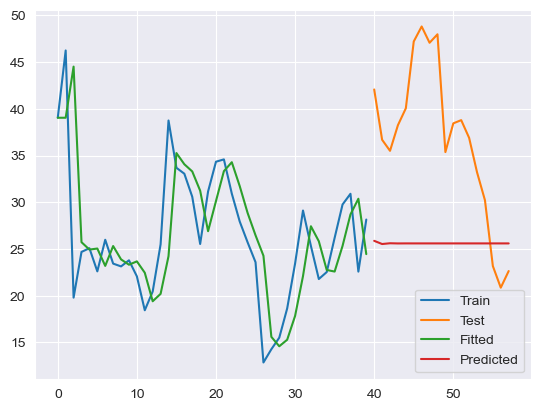

In [24]:
plt.plot(train_data, label='Train')
plt.plot(test_data, label='Test')
plt.plot(fitted, label='Fitted')
plt.plot(predicted, label='Predicted')
plt.legend()